<a href="https://colab.research.google.com/github/dmsoli/dmsoli/blob/main/cars_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import and take a quick look at the data

In [35]:
import pandas as pd
cars = pd.read_csv("/content/drive/MyDrive/csv_data_files/train-data.csv")
cars.info()
cars.rename(columns=str.lower, inplace = True) # lowering the columns' name

cars.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


,unnamed: 0,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


Inspecting each one of the variables:
1 - name

In [36]:
cars["name"].head()
cars["name"].value_counts(normalize = True)
# it is likely that name variable has no predictive power. Then, I'm gonna drop it

cars.drop(["unnamed: 0", "name"], axis = 1, inplace = True)
cars.columns

Index(['location', 'year', 'kilometers_driven', 'fuel_type', 'transmission',
       'owner_type', 'mileage', 'engine', 'power', 'seats', 'new_price',
       'price'],
      dtype='object')

 **Inspecting each one of the variables:
2 - location** 

In [37]:
cars["location"].head()
cars["location"].value_counts()
print(len(cars["location"].value_counts())) # the number of categories in the variable
# It looks like a good variable. I'll keep it

11


Inspecting each one of the variables: 3 - Year

In [38]:
cars["year"].head()
cars["year"].describe()
# year is ok!

count    6019.000000
mean     2013.358199
std         3.269742
min      1998.000000
25%      2011.000000
50%      2014.000000
75%      2016.000000
max      2019.000000
Name: year, dtype: float64

Inspecting each one of the variables: 4 - kilometers_driven

In [39]:
cars["kilometers_driven"].head()
cars["kilometers_driven"].describe()
# kilometers_driven is ok!

count    6.019000e+03
mean     5.873838e+04
std      9.126884e+04
min      1.710000e+02
25%      3.400000e+04
50%      5.300000e+04
75%      7.300000e+04
max      6.500000e+06
Name: kilometers_driven, dtype: float64

Inspection the variables: 5 - Fuel_Type

In [60]:
import numpy as np

cars["fuel_type"].head()
cars["fuel_type"].value_counts()

# Converting LPG and CNG into a unique value: Gas
values = ["LPG", "CNG"]
cars.loc[cars["fuel_type"].isin(values), "fuel_type"] = "Gas"

cars["fuel_type"].value_counts()

# Once we have only the rows in which fuel type is electric I decided to drop those rows
indexes = cars.loc[cars["fuel_type"] == "Electric"].index
indexes
cars.drop(indexes, axis=0, inplace = True)



Inspection the variables: 6 - transmission

In [48]:
cars["transmission"].head()
cars["transmission"].value_counts()
# transmission is ok!

Manual       4299
Automatic    1718
Name: transmission, dtype: int64

Inspection the variables: 7 - owner_type

In [49]:
cars["owner_type"].head()
cars["owner_type"].value_counts()

# Converting values Third and Fourth & Above into one unique value: Third & Above
values = ["Third", "Fourth & Above"]
cars.loc[cars["owner_type"].isin(values), "owner_type"] = "Third & Above"

cars["owner_type"].value_counts()

First            4927
Second            968
Third & Above     122
Name: owner_type, dtype: int64

Inspection the variables: 8 - mileage

In [50]:
cars["mileage"].head()

# How many values end with km/kg or kmpl?
ends_with_kmkg = []
ends_with_kmpl = []

for index, row in cars.iterrows():
  if str(row["mileage"]).endswith("km/kg"):
    ends_with_kmkg.append(row["mileage"])
  else:
    ends_with_kmpl.append(row["mileage"])

print("end with km/kg:", len(ends_with_kmkg))
print("end with kmpl:", len(ends_with_kmpl))

# identifying the missing values
cars["mileage"].isnull().sum()

# Keep only the digits and convert the variable into a numerical one
cars["mileage"] = cars["mileage"].str.extract("(\d+\.?\d+)", expand = True)
cars["mileage"] = pd.to_numeric(cars["mileage"])
cars["mileage"].head()
cars.info()

end with km/kg: 66
end with kmpl: 5951
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   location           6017 non-null   object 
 1   year               6017 non-null   int64  
 2   kilometers_driven  6017 non-null   int64  
 3   fuel_type          6017 non-null   object 
 4   transmission       6017 non-null   object 
 5   owner_type         6017 non-null   object 
 6   mileage            6017 non-null   float64
 7   engine             5981 non-null   object 
 8   power              5981 non-null   object 
 9   seats              5975 non-null   float64
 10  new_price          823 non-null    object 
 11  price              6017 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 771.1+ KB


Inspection the variables: 9 - engine

In [51]:
cars["engine"].head()

# How many values end with cc or with other suffixes?
end_with_cc = []
others = []

for index, row in cars.iterrows():
  if str(row["engine"]).endswith("CC"):
    end_with_cc.append(row["engine"])
  else:
    others.append(row["engine"])

print("end with cc:", len(end_with_cc))
print("others:", len(others))

# identifying the missing values
# the number of values that end with other suffixes are actually missing values
print("Missing values:", cars["engine"].isnull().sum())

# Keep only the digits, convert the variable into a numerical one and change the variable name
cars["engine"] = cars["engine"].str.extract("(\d+\.?\d+)", expand = True)

cars["engine"] = pd.to_numeric(cars["engine"])

cars.rename(columns = {"engine":"engine_cc"}, inplace = True)

cars.columns




end with cc: 5981
others: 36
Missing values: 36


Index(['location', 'year', 'kilometers_driven', 'fuel_type', 'transmission',
       'owner_type', 'mileage', 'engine_cc', 'power', 'seats', 'new_price',
       'price'],
      dtype='object')

Inspection the variables: 10 - power

In [52]:
cars["power"].head()

# How many values end with bhp or with other suffixes?
end_with_bhp = []
others = []

for index, row in cars.iterrows():
  if str(row["power"]).endswith("bhp"):
    end_with_bhp.append(row["power"])
  else:
    others.append(row["power"])

print("end with bhp:", len(end_with_bhp))
print("others:", len(others))

# identifying the missing values
# the number of values that end with other suffixes are actually missing values
print("Missing_values:", cars["power"].isnull().sum())

# Keep only the digits, convert the variable into a numerical one and change the variable name
cars["power"] = cars["power"].str.extract("(\d+\.?\d+)")

cars["power"] = pd.to_numeric(cars["power"])

cars.rename(columns = {"power":"power_bhp"}, inplace = True)
cars.info()

end with bhp: 5981
others: 36
Missing_values: 36
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   location           6017 non-null   object 
 1   year               6017 non-null   int64  
 2   kilometers_driven  6017 non-null   int64  
 3   fuel_type          6017 non-null   object 
 4   transmission       6017 non-null   object 
 5   owner_type         6017 non-null   object 
 6   mileage            6017 non-null   float64
 7   engine_cc          5981 non-null   float64
 8   power_bhp          5874 non-null   float64
 9   seats              5975 non-null   float64
 10  new_price          823 non-null    object 
 11  price              6017 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 771.1+ KB


Inspection the variables: 11 - seats

In [53]:
cars["seats"].head()
cars["seats"].isnull().sum()


42

**Inspection the variables: 12 - new_price**

In [54]:
cars["new_price"].head()
missing_values_perc = cars["new_price"].isnull().sum()/len(cars)
print(f"{missing_values_perc :.2%}")

# There are so many missing values in this column. It is better to drop it

cars.drop("new_price", axis = 1, inplace = True)
cars.columns

86.32%


Index(['location', 'year', 'kilometers_driven', 'fuel_type', 'transmission',
       'owner_type', 'mileage', 'engine_cc', 'power_bhp', 'seats', 'price'],
      dtype='object')

**Correlation Matrix**

In [ ]:
corr_matrix = cars.corr()
corr_matrix

# Which is the variable that is more correlated with the price?
corr_matrix["price"].sort_values(ascending = False)

In [66]:
cars.groupby(["transmission", "fuel_type"])["price"].mean()

transmission  fuel_type
Automatic     Diesel       24.583078
              Petrol       11.258738
Manual        Diesel        6.636190
              Gas           3.360758
              Petrol        4.113947
Name: price, dtype: float64

**Graphs**

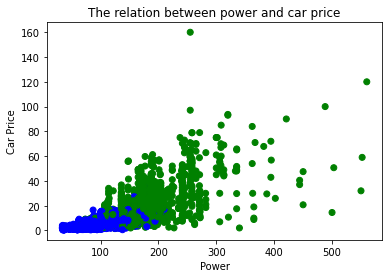

In [62]:
# scatter plot: power and car price by transmission
colors = []

for index, row in cars.iterrows():
  if row["transmission"] == "Manual":
    colors.append("blue")
  else:
    colors.append("green")

import matplotlib.pyplot as plt
plt.scatter(cars["power_bhp"], cars["price"], c = colors)
plt.xlabel("Power")
plt.ylabel("Car Price")
plt.title("The relation between power and car price") 
plt.show()

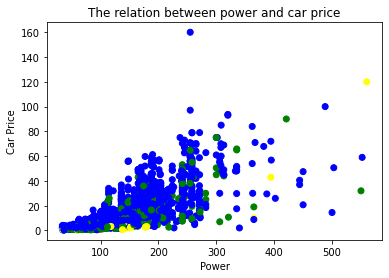

In [63]:
colors = []

for index, row in cars.iterrows():
  if row["owner_type"] == "First":
    colors.append("blue")
  elif row["owner_type"] == "Second":
    colors.append("green")
  else:
    colors.append("yellow")

plt.scatter(cars["power_bhp"], cars["price"], c = colors)
plt.xlabel("Power")
plt.ylabel("Car Price")
plt.title("The relation between power and car price") 
plt.show()

**Preparating the dataset to Machine Learning**

In [64]:
cars_predictors = cars.drop("price", axis = 1)
cars_label = cars["price"].copy()

In [70]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_attributes = ["year", "kilometers_driven", "mileage",
                  "engine_cc", "power_bhp", "seats"]
cat_attributes = ["location", "fuel_type", "transmission", "owner_type"]

num_pipeline = Pipeline([
                         ("imputer", SimpleImputer(strategy="median")),
                         ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
                         ("imputer", SimpleImputer(strategy="most_frequent")),
                         ("encoder", OneHotEncoder(sparse = False))
])

full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attributes),
                                   ("cat", cat_pipeline, cat_attributes)

])

cars_train_pred = full_pipeline.fit_transform(cars_predictors)

**Linear Regression**

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, cars_train_pred, cars_label, cv = 3,
                         scoring = "neg_mean_squared_error")

lin_reg_rmse = np.sqrt(-scores)

def display_scores(scores):
  print("Scores:",scores)
  print("Mean:",scores.mean())
  print("Standard Deviation:",scores.std())

display_scores(lin_reg_rmse)


Scores: [6.42146499 7.21014448 6.31655654]
Mean: 6.649388671965728
Standard Deviation: 0.3988205584281071
